In [26]:
import pandas as pd
import numpy as np

df= pd.read_csv("/content/salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3006 non-null   int64 
 1   experience_level    3006 non-null   object
 2   employment_type     3006 non-null   object
 3   job_title           3006 non-null   object
 4   salary              3006 non-null   int64 
 5   salary_currency     3006 non-null   object
 6   salary_in_usd       3006 non-null   int64 
 7   employee_residence  3006 non-null   object
 8   remote_ratio        3006 non-null   int64 
 9   company_location    3006 non-null   object
 10  company_size        3006 non-null   object
dtypes: int64(4), object(7)
memory usage: 258.5+ KB


In [28]:
df["work_year"]=df["work_year"].astype(str)
df["remote_ratio"]=df["remote_ratio"].astype(str)

In [29]:
df.shape

(3006, 11)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,3006.0,197700.007984,747409.002073,5000.0,95000.00,135000.0,179993.75,30400000.0
salary_in_usd,3006.0,134282.715569,62764.987716,5000.0,91427.75,130000.0,172339.50,450000.0


In [31]:
print(df.duplicated().sum())
print(df.isna().sum())

844
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [32]:
df.loc[df.duplicated(),:]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
40,2023,SE,FT,Data Engineer,252000,USD,252000,US,0,US,M
41,2023,SE,FT,Data Engineer,129000,USD,129000,US,0,US,M
97,2023,SE,FT,Machine Learning Engineer,153400,USD,153400,US,0,US,M
98,2023,SE,FT,Machine Learning Engineer,122700,USD,122700,US,0,US,M
100,2023,MI,FT,Data Engineer,175000,USD,175000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
2690,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
2691,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2692,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
2837,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [33]:
tmp=df.groupby(["job_title", "work_year"]).size().reset_index().rename(columns={0:"count"}).sort_values(by="count", ascending=False)

In [34]:
tmp.head()

,job_title,work_year,count
70,Data Engineer,2022,486
102,Data Scientist,2022,403
71,Data Engineer,2023,294
54,Data Analyst,2022,276
103,Data Scientist,2023,199


In [35]:
tmp2020=tmp[tmp["work_year"]=="2020"].sort_values("count", ascending=False).head(10)
tmp2021=tmp[tmp["work_year"]=="2021"].sort_values("count", ascending=False).head(10)
tmp2022=tmp[tmp["work_year"]=="2022"].sort_values("count", ascending=False).head(10)

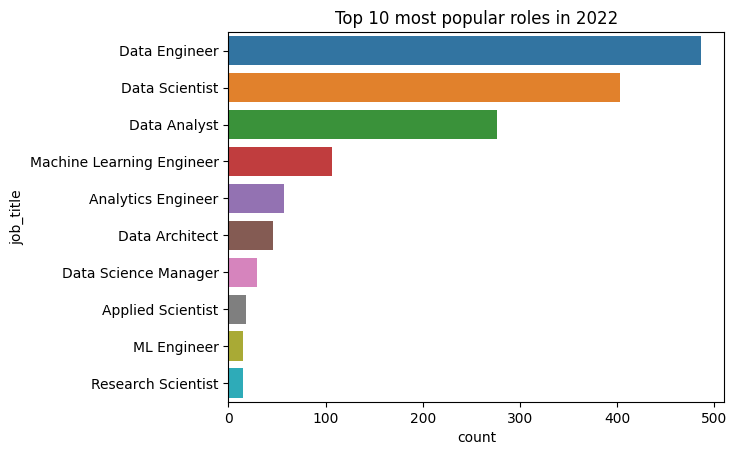

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=tmp2022["count"], y=tmp2022['job_title']).set_title("Top 10 most popular roles in 2022")
plt.show()

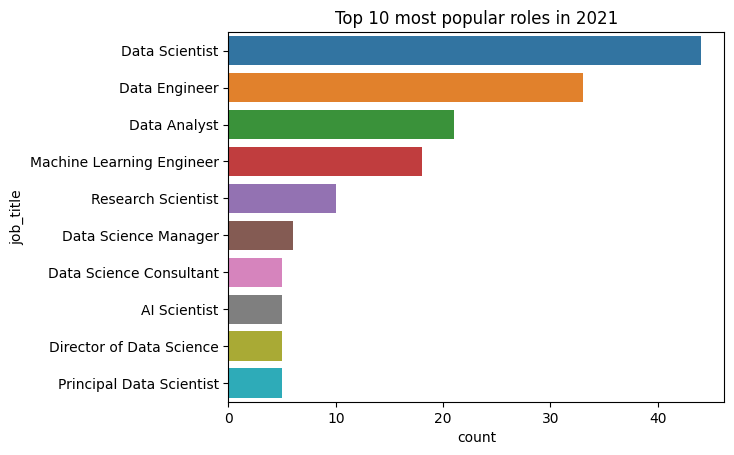

In [39]:
sns.barplot(x=tmp2021["count"], y=tmp2021['job_title']).set_title("Top 10 most popular roles in 2021")
plt.show()

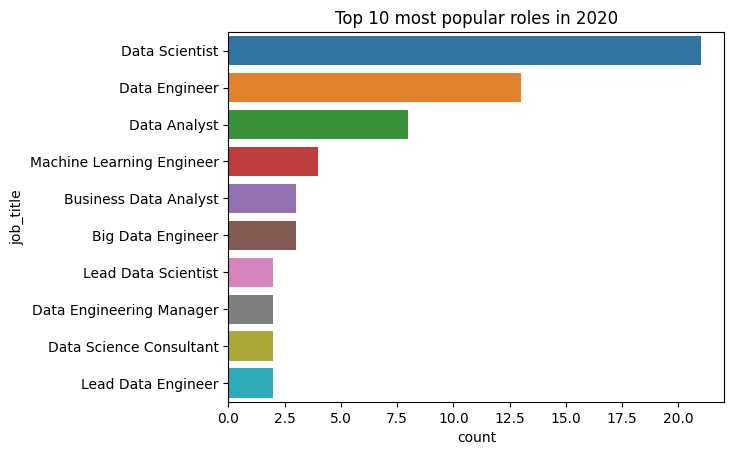

In [40]:
sns.barplot(x=tmp2020["count"], y=tmp2020['job_title']).set_title("Top 10 most popular roles in 2020")
plt.show()

In [42]:
tmd=df[["salary_in_usd", "work_year", "company_size"]].groupby(["salary_in_usd", "work_year", "company_size"]).agg(highest_salary=("salary_in_usd", max), average_salary=("salary_in_usd", np.mean)).reset_index()

In [43]:
tmd.head()

,salary_in_usd,work_year,company_size,highest_salary,average_salary
0,5000,2022,M,5000,5000.0
1,5132,2022,M,5132,5132.0
2,5409,2021,L,5409,5409.0
3,5409,2021,M,5409,5409.0
4,5679,2021,S,5679,5679.0


In [45]:
tmp2020=tmd[tmd["work_year"]=="2020"].sort_values("average_salary", ascending=False).head(10)
tmp2021=tmd[tmd["work_year"]=="2021"].sort_values("average_salary", ascending=False).head(10)
tmp2022=tmd[tmd["work_year"]=="2022"].sort_values("average_salary", ascending=False).head(10)

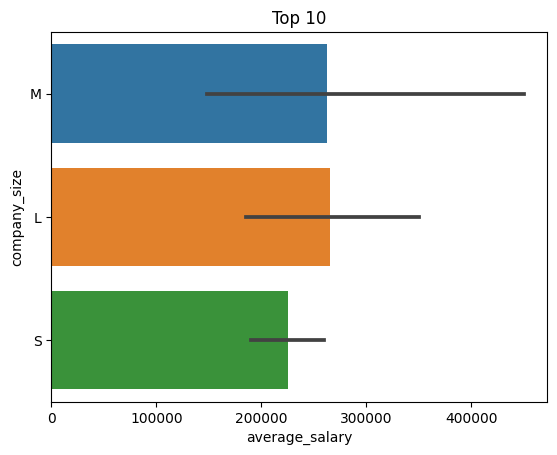

In [46]:
sns.barplot(x=tmp2020["average_salary"], y=tmp2020['company_size']).set_title("Top 10")
plt.show()

In [47]:
tma=df[["salary_in_usd", "work_year", "company_location"]].groupby(["salary_in_usd", "work_year", "company_location"]).agg(highest_salary=("salary_in_usd", max), average_salary=("salary_in_usd", np.mean)).reset_index()

In [48]:
tma.head()

,salary_in_usd,work_year,company_location,highest_salary,average_salary
0,5000,2022,NG,5000,5000.0
1,5132,2022,CZ,5132,5132.0
2,5409,2021,IN,5409,5409.0
3,5679,2021,US,5679,5679.0
4,5707,2020,IN,5707,5707.0


In [49]:
tmp2020=tma[tma["work_year"]=="2020"].sort_values("average_salary", ascending=False).head(10)
tmp2021=tma[tma["work_year"]=="2021"].sort_values("average_salary", ascending=False).head(10)
tmp2022=tma[tma["work_year"]=="2022"].sort_values("average_salary", ascending=False).head(10)

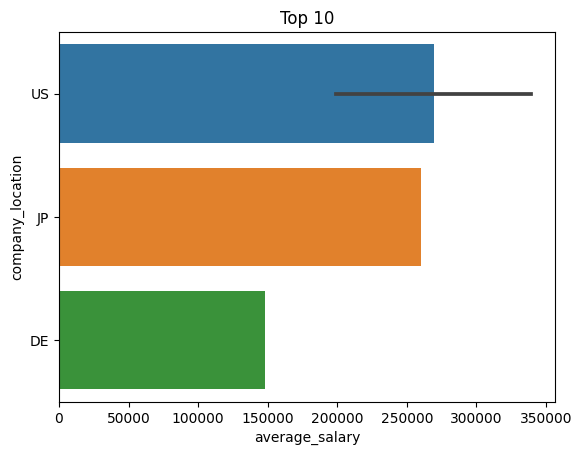

In [50]:
sns.barplot(x=tmp2020["average_salary"], y=tmp2020['company_location']).set_title("Top 10")
plt.show()